In [266]:
import math
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [267]:
num_points = 10
num_lines = num_points

In [268]:
radius_degrees = np.random.rand(num_points, 2)

In [269]:
sum_degrees = np.sum(radius_degrees[:,1])
radius_degrees[:,1] = np.cumsum(radius_degrees[:,1] / sum_degrees)

In [270]:
def radiusToPosition(radius_degree):
    return np.array([
        radius_degree[0] / 2 * math.sin(radius_degree[1] * 2 * math.pi) + 0.5,
        radius_degree[0] / 2 * math.cos(radius_degree[1] * 2 * math.pi) + 0.5
    ])

In [271]:
positions = np.array(list(map(radiusToPosition, radius_degrees)))

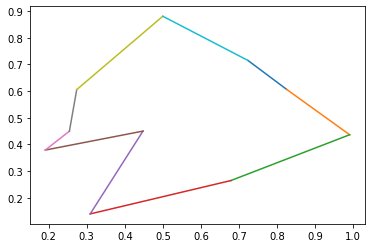

In [272]:
def toLine(index):
    next_index = (index + 1) % num_points
    return np.array([positions[index], positions[next_index]])
indices = np.arange(num_points)
lines = np.array(list(map(toLine,indices)))

for line in lines:
    plt.plot(line[:,0], line[:,1])

In [273]:
point_amount_per_line = 10

In [274]:
percentages = np.concatenate((np.arange(num_lines).reshape(num_lines, 1), np.random.rand(num_lines, point_amount_per_line)), axis=1)

In [275]:
def getSamplePoints(entry):
    index = int(entry[0])
    percentages = entry[1:]
    return np.array(list(map(lambda percentage:
                             np.array([
                                 lines[index][0][0] * percentage + lines[index][1][0]  * (1 - percentage),
                                 lines[index][0][1] * percentage + lines[index][1][1] * (1 - percentage)]
                            ), percentages)))
    
sample_points = np.concatenate(np.array(list(map(getSamplePoints, percentages))))

In [373]:
def drawImage(points, resolution):
    #todo draw image from -1 -> 1
    fig = plt.figure(dpi=resolution)

    fig.set_size_inches((1,1))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    fig.add_axes(ax)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.plot(points[:,0], points[:,1], '.', markersize=3,label='_nolegend_')

    fig.canvas.draw()
    temp_canvas = fig.canvas
    plt.close()

    pil_image = PIL.Image.frombytes('RGB', temp_canvas.get_width_height(),  temp_canvas.tostring_rgb())
    plt.imshow(pil_image)

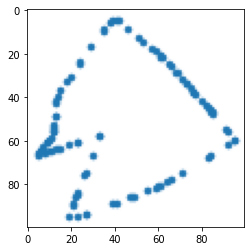

In [331]:
drawImage(sample_points, 100)

In [320]:
origin = sample_points[0]
comparator = sample_points[1]

In [367]:
vec = comparator - origin
vec_length = np.linalg.norm(vec)
rotation = math.asin(vec[0] / vec_length)

if(vec[1] < 0):
    rotation += 180

rotation / math.pi * 180

-43.163506516013605

In [372]:
matrix = np.zeros((3,3))
scale = 1 / (2 * vec_length)
matrix[0][0]= scale
matrix[0][2]= - vec[0] #translate x
matrix[1][1]= scale
matrix[1][2]= - vec[1] #translate y
matrix[2][2]=1
#todo rotation

In [369]:
points = np.concatenate((sample_points, np.ones((point_amount_per_line * num_lines, 1))), axis=1)
transformed_points = np.array(list(map(lambda point: np.matmul(matrix, point), points)))

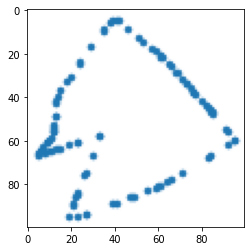

In [370]:
drawImage(transformed_points, 100)